# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:

import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
from shapely.prepared import prep
import matplotlib.pyplot as plt
import os
import rioxarray as rxr


In [2]:
dred = pd.read_csv('data/db_red_maple.csv', dtype={'latitude': 'float64', 'longitude': 'float64'})

In [3]:
dred

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k
0,577458,EO,47.761208,100,-73.022446,344,4.5000,85.0,85.0,1.765863,...,24.643180,301.000,19.051277,78.625160,588.10000,35.535050,-6.559094,9.199162,733.57570,1
1,1033211,EO,46.432621,100,-75.445401,239,5.1067,13.0,51.0,3.338708,...,12.093941,294.750,17.747839,75.759040,625.57500,33.815228,-1.487061,8.546481,798.44330,3
2,911397,EO,46.028920,100,-74.745012,285,5.5000,2.0,93.0,2.942621,...,12.358034,304.150,16.637333,82.134315,653.25000,33.674984,-4.342159,6.658854,784.00290,3
3,69869,EO,46.839032,100,-70.519246,363,3.5167,24.0,45.0,3.264520,...,17.166555,343.700,15.861320,91.072400,721.94995,32.355210,-5.601314,10.016439,715.82350,0
4,1521793,EO,48.080635,91,-79.398379,331,5.7000,90.0,0.0,0.868738,...,24.928170,261.750,20.987915,76.240395,541.90000,36.527588,-11.209414,9.943170,717.10360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847957,772824,EO,45.995362,100,-74.002996,372,6.1000,69.0,4.0,4.209070,...,9.217865,285.925,17.601393,72.901840,636.12500,32.952133,-0.846002,3.312908,781.30550,3
847958,1073892,EO,46.137758,100,-75.599060,328,4.6167,4.0,81.0,3.904474,...,12.178079,280.350,19.275383,68.300415,591.17500,33.885113,-0.613117,7.181046,802.66705,3
847959,1336875,EO,46.359258,100,-77.158444,318,4.5000,85.0,85.0,3.932580,...,16.052400,237.125,23.497679,59.750330,521.40000,34.233120,-2.733226,9.741150,812.64520,1
847960,403313,EO,47.485293,100,-68.537980,362,4.8000,8.0,34.0,2.571893,...,15.102576,275.700,18.190674,79.534220,590.47500,32.157380,-2.661742,8.380980,732.18720,3


In [4]:
# 2. Crear GeoDataFrame de presencias
geometry = [Point(lon, lat) for lon, lat in zip(dred['longitude'], dred['latitude'])]
presences_gdf = gpd.GeoDataFrame(dred.copy(), geometry=geometry, crs="EPSG:4326")

In [5]:
presences_gdf

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k,geometry
0,577458,EO,47.761208,100,-73.022446,344,4.5000,85.0,85.0,1.765863,...,301.000,19.051277,78.625160,588.10000,35.535050,-6.559094,9.199162,733.57570,1,POINT (-73.02245 47.76121)
1,1033211,EO,46.432621,100,-75.445401,239,5.1067,13.0,51.0,3.338708,...,294.750,17.747839,75.759040,625.57500,33.815228,-1.487061,8.546481,798.44330,3,POINT (-75.4454 46.43262)
2,911397,EO,46.028920,100,-74.745012,285,5.5000,2.0,93.0,2.942621,...,304.150,16.637333,82.134315,653.25000,33.674984,-4.342159,6.658854,784.00290,3,POINT (-74.74501 46.02892)
3,69869,EO,46.839032,100,-70.519246,363,3.5167,24.0,45.0,3.264520,...,343.700,15.861320,91.072400,721.94995,32.355210,-5.601314,10.016439,715.82350,0,POINT (-70.51925 46.83903)
4,1521793,EO,48.080635,91,-79.398379,331,5.7000,90.0,0.0,0.868738,...,261.750,20.987915,76.240395,541.90000,36.527588,-11.209414,9.943170,717.10360,1,POINT (-79.39838 48.08064)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847957,772824,EO,45.995362,100,-74.002996,372,6.1000,69.0,4.0,4.209070,...,285.925,17.601393,72.901840,636.12500,32.952133,-0.846002,3.312908,781.30550,3,POINT (-74.003 45.99536)
847958,1073892,EO,46.137758,100,-75.599060,328,4.6167,4.0,81.0,3.904474,...,280.350,19.275383,68.300415,591.17500,33.885113,-0.613117,7.181046,802.66705,3,POINT (-75.59906 46.13776)
847959,1336875,EO,46.359258,100,-77.158444,318,4.5000,85.0,85.0,3.932580,...,237.125,23.497679,59.750330,521.40000,34.233120,-2.733226,9.741150,812.64520,1,POINT (-77.15844 46.35926)
847960,403313,EO,47.485293,100,-68.537980,362,4.8000,8.0,34.0,2.571893,...,275.700,18.190674,79.534220,590.47500,32.157380,-2.661742,8.380980,732.18720,3,POINT (-68.53798 47.48529)


In [6]:
# 4. Reproyectar
from pyproj import Transformer
from shapely.ops import transform

In [7]:
print("Reproyectando presencias...")
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32198", always_xy=True)
presences_proj_geom = presences_gdf.geometry.apply(lambda geom: transform(transformer.transform, geom))
presences_proj = gpd.GeoDataFrame(presences_gdf.drop(columns='geometry'), geometry=presences_proj_geom)
presences_proj.set_crs("EPSG:32198", allow_override=True, inplace=True)

Reproyectando presencias...


,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k,geometry
0,577458,EO,47.761208,100,-73.022446,344,4.5000,85.0,85.0,1.765863,...,301.000,19.051277,78.625160,588.10000,35.535050,-6.559094,9.199162,733.57570,1,POINT (-337745.54 428899.35)
1,1033211,EO,46.432621,100,-75.445401,239,5.1067,13.0,51.0,3.338708,...,294.750,17.747839,75.759040,625.57500,33.815228,-1.487061,8.546481,798.44330,3,POINT (-532511.46 296685.91)
2,911397,EO,46.028920,100,-74.745012,285,5.5000,2.0,93.0,2.942621,...,304.150,16.637333,82.134315,653.25000,33.674984,-4.342159,6.658854,784.00290,3,POINT (-482865.26 247053.66)
3,69869,EO,46.839032,100,-70.519246,363,3.5167,24.0,45.0,3.264520,...,343.700,15.861320,91.072400,721.94995,32.355210,-5.601314,10.016439,715.82350,0,POINT (-153767.5 318115.51)
4,1521793,EO,48.080635,91,-79.398379,331,5.7000,90.0,0.0,0.868738,...,261.750,20.987915,76.240395,541.90000,36.527588,-11.209414,9.943170,717.10360,1,POINT (-805940.7 515109.13)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847957,772824,EO,45.995362,100,-74.002996,372,6.1000,69.0,4.0,4.209070,...,285.925,17.601393,72.901840,636.12500,32.952133,-0.846002,3.312908,781.30550,3,POINT (-425899.81 238624.65)
847958,1073892,EO,46.137758,100,-75.599060,328,4.6167,4.0,81.0,3.904474,...,280.350,19.275383,68.300415,591.17500,33.885113,-0.613117,7.181046,802.66705,3,POINT (-547498.74 265245.62)
847959,1336875,EO,46.359258,100,-77.158444,318,4.5000,85.0,85.0,3.932580,...,237.125,23.497679,59.750330,521.40000,34.233120,-2.733226,9.741150,812.64520,1,POINT (-664258.1 302910.31)
847960,403313,EO,47.485293,100,-68.537980,362,4.8000,8.0,34.0,2.571893,...,275.700,18.190674,79.534220,590.47500,32.157380,-2.661742,8.380980,732.18720,3,POINT (-2854.52 387637.46)


# Pseudo-absence Generation
To create pseudo-absences unbiased by proximity to presences, we implemented the following steps:

Created 1 km exclusion buffers around each presence point.
Uniformly sampled random candidate points across the Québec bounding box.
Retained points inside Québec and outside the exclusion buffer, until 40,000 valid pseudo-absences were obtained.
Pseudo-absence points were saved as data/pseudoausencias_quebec.geojson (projected) and data/pseudoausencias_latlon_sugarmaple.csv (geographic).

In [8]:
# 1. Cargar provincias de Canadá
print("Cargando shapefile...")
provincias = gpd.read_file("Politic_divition/lpr_000b21a_e.shp")
print(f"CRS detectado: {provincias.crs}")

# 2. Filtrar sólo Québec
print("Filtrando Québec...")
quebec_map = provincias[provincias['PRENAME'] == 'Quebec'].copy()

# 3. Limpiar geometrías
print("Limpiando geometrías...")
quebec_map = quebec_map[quebec_map.geometry.notnull()]
quebec_map = quebec_map[~quebec_map.geometry.is_empty]
quebec_map = quebec_map[quebec_map.is_valid]

# 4. Reproyectar de EPSG:3347 a EPSG:32198
print("Reproyectando Québec a EPSG:32198...")
quebec_proj = quebec_map.to_crs("EPSG:32198")

# 5. Verificar límites
print("Calculando límites...")
minx, miny, maxx, maxy = quebec_proj.total_bounds
print(f"Límites: minx={minx}, miny={miny}, maxx={maxx}, maxy={maxy}")

Cargando shapefile...
CRS detectado: EPSG:3347
Filtrando Québec...
Limpiando geometrías...
Reproyectando Québec a EPSG:32198...
Calculando límites...
Límites: minx=-830844.1785054514, miny=117973.29776183645, maxx=783631.6436369262, maxy=2091048.2097644005


In [9]:
print("Generando zona de exclusión...")
buffer_m = 1000  # Buffer de 1000 metros
exclusion_zone = presences_proj.buffer(buffer_m)
exclusion_union = unary_union(exclusion_zone)
exclusion_prepared = prep(exclusion_union)

Generando zona de exclusión...


In [10]:
print("Calculando límites de Québec...")
minx, miny, maxx, maxy = quebec_proj.total_bounds

Calculando límites de Québec...


In [11]:
print("Generando puntos candidatos...")
n_desired = 40000  # Número de pseudoausencias que quieres
batch_multiplier = 5  # Generar más para filtrar después

x_coords = np.random.uniform(minx, maxx, n_desired * batch_multiplier)
y_coords = np.random.uniform(miny, maxy, n_desired * batch_multiplier)
candidate_points = [Point(x, y) for x, y in zip(x_coords, y_coords)]

Generando puntos candidatos...


In [12]:
# 9. Filtrar puntos: dentro de Québec y fuera del buffer
quebec_union = quebec_proj.unary_union
quebec_prepared = prep(quebec_union)

valid_points = []
for pt in candidate_points:
    if quebec_prepared.contains(pt) and not exclusion_prepared.contains(pt):
        valid_points.append(pt)
        if len(valid_points) >= n_desired:
            break

print(f"Total pseudoausencias generadas: {len(valid_points)}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3248\3944305408.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  quebec_union = quebec_proj.unary_union


Total pseudoausencias generadas: 40000


In [13]:
# 10. Crear GeoDataFrame de pseudoausencias
pseudo_gdf = gpd.GeoDataFrame(geometry=valid_points, crs="EPSG:32198")

# 11. Guardar a GeoJSON
print("Guardando pseudoausencias en archivo...")
pseudo_gdf.to_file("data/pseudoausencias_quebec_red.geojson", driver="GeoJSON")

Guardando pseudoausencias en archivo...


Graficando...


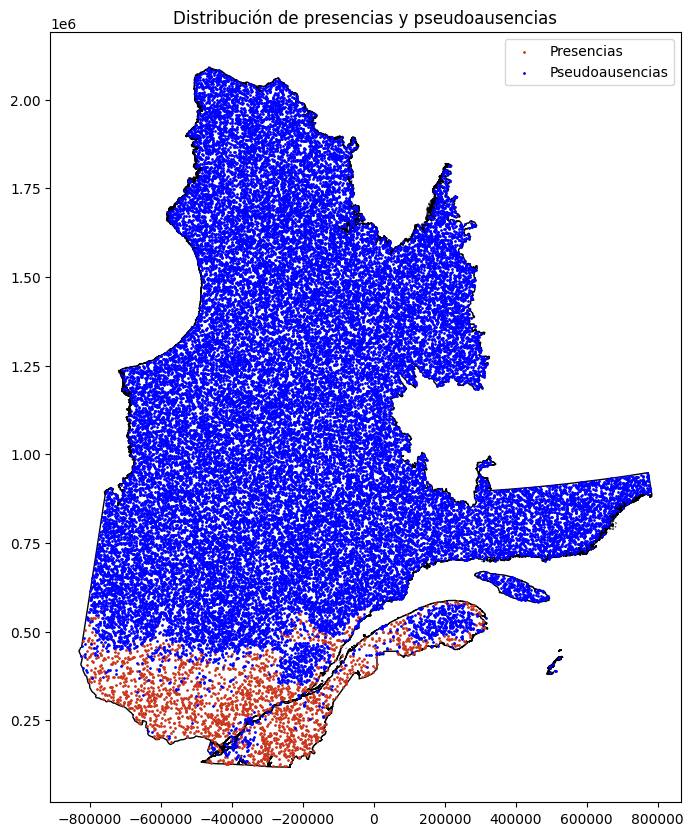

In [14]:
print("Graficando...")
ax = quebec_proj.plot(color='none', edgecolor='black', figsize=(10, 10))
presences_proj.sample(2000).plot(ax=ax, color='#ca361c', markersize=1, label="Presencias")
pseudo_gdf.plot(ax=ax, color='blue', markersize=1, label="Pseudoausencias")
plt.legend()
plt.title("Distribución de presencias y pseudoausencias")
plt.show()

In [24]:
pseudo_gdf = gpd.GeoDataFrame(geometry=valid_points, crs="EPSG:32198")

# 11. Reproyectar de regreso a EPSG:4326 (latitud-longitud)
pseudo_gdf_latlon = pseudo_gdf.to_crs("EPSG:4326")

# 12. Extraer columnas de latitud y longitud
pseudo_gdf_latlon['longitude'] = pseudo_gdf_latlon.geometry.x
pseudo_gdf_latlon['latitude'] = pseudo_gdf_latlon.geometry.y

# 13. Crear un DataFrame plano si quieres
pseudo_df = pseudo_gdf_latlon[['latitude', 'longitude']].copy()

# 14. Guardar como CSV
pseudo_df.to_csv("data/pseudoausencias_latlon_redmaple.csv", index=False)

In [25]:
dredm = dred.drop(columns=['elev','forest', 'essence', 'cluster_k' ])
pseured = pseudo_df.copy()

In [26]:
print(dredm.columns)

Index(['Unnamed: 0', 'latitude', 'longitude', 'ph', 'clay', 'sand', 'bio1',
       'bio2', 'bio3', 'bio8', 'bio9', 'bio10', 'bio11', 'bio12', 'bio14',
       'bio15', 'bio18', 'bio20', 'bio23', 'bio24', 'bio27', 'bio30', 'bio31',
       'bio34'],
      dtype='object')


In [27]:
ruta_rasters = "recortados_alineados"
#dredm
variables = [
'ph', 'clay', 'sand', 'bio1', 'bio2', 'bio3', 'bio8', 'bio9', 'bio10',
'bio11', 'bio12', 'bio14', 'bio15', 'bio18', 'bio20', 'bio23', 'bio24',
'bio27', 'bio30', 'bio31', 'bio34'
]
geometry = [Point(lon, lat) for lon, lat in zip(pseured['longitude'], pseured['latitude'])]
pseudo_gdf = gpd.GeoDataFrame(pseured.copy(), geometry=geometry, crs="EPSG:4326")

# 5. Crear columnas vacías para las variables
for var in variables:
    pseured[var] = np.nan
for var in variables:
    print(f"Extrayendo valores de {var}.tif...")
    ruta_raster = os.path.join(ruta_rasters, f"{var}.tif")
    raster = rxr.open_rasterio(ruta_raster, masked=True).squeeze()  # quitar dimensión de banda

    # Asegurar CRS
    if raster.rio.crs is None:
        raster = raster.rio.write_crs("EPSG:4326")

    # Reproyectar puntos si es necesario
    if pseudo_gdf.crs != raster.rio.crs:
        pseudo_gdf = pseudo_gdf.to_crs(raster.rio.crs)

    # Extraer valores
    pseudo_gdf[var] = [float(raster.sel(x=pt.x, y=pt.y, method="nearest").values) for pt in pseudo_gdf.geometry]

Extrayendo valores de ph.tif...
Extrayendo valores de clay.tif...
Extrayendo valores de sand.tif...
Extrayendo valores de bio1.tif...
Extrayendo valores de bio2.tif...
Extrayendo valores de bio3.tif...
Extrayendo valores de bio8.tif...
Extrayendo valores de bio9.tif...
Extrayendo valores de bio10.tif...
Extrayendo valores de bio11.tif...
Extrayendo valores de bio12.tif...
Extrayendo valores de bio14.tif...
Extrayendo valores de bio15.tif...
Extrayendo valores de bio18.tif...
Extrayendo valores de bio20.tif...
Extrayendo valores de bio23.tif...
Extrayendo valores de bio24.tif...
Extrayendo valores de bio27.tif...
Extrayendo valores de bio30.tif...
Extrayendo valores de bio31.tif...
Extrayendo valores de bio34.tif...


In [28]:
pseudo_gdf['presencia'] = 0  # 0 para pseudoausencias
pseudo_gdf

,latitude,longitude,geometry,ph,clay,sand,bio1,bio2,bio3,bio8,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,presencia
0,50.373195,-61.329162,POINT (-61.32916 50.3732),4.8,14.0,30.0,0.867731,8.407121,22.499058,-0.799092,...,14.806664,272.625000,12.269671,102.868309,567.075012,28.713875,1.725658,0.716195,524.357483,0
1,60.001323,-73.297184,POINT (-73.29718 60.00132),7.6,43.0,43.0,-8.303259,7.182026,16.928209,-1.816783,...,33.865341,105.025002,25.235153,67.272926,134.225006,34.339539,-12.722965,-0.826364,272.780518,0
2,49.423342,-77.356921,POINT (-77.35692 49.42334),4.5,85.0,88.0,-0.122168,11.778324,23.698448,12.234498,...,38.897888,311.100006,19.105167,87.094017,577.349976,37.180862,-13.501885,13.197699,675.840576,0
3,51.037444,-62.784714,POINT (-62.78471 51.03744),4.5,85.0,85.0,-2.250678,9.528137,22.405598,3.721718,...,20.603636,270.299988,14.418393,115.686317,507.674988,32.476479,-7.634829,2.319249,494.927704,0
4,52.002260,-76.343781,POINT (-76.34378 52.00226),4.5,85.0,85.0,-2.728735,10.798678,22.005671,7.055883,...,42.885124,223.074997,20.951912,85.027687,441.250000,37.379951,-15.258462,5.312514,559.301758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,51.949281,-62.673070,POINT (-62.67307 51.94928),4.5,85.0,85.0,-2.725043,9.892118,22.420219,4.136234,...,21.923220,269.549988,15.599364,111.136398,485.074982,33.878387,-7.642048,3.728754,495.901459,0
39996,56.720122,-76.421744,POINT (-76.42174 56.72012),7.6,43.0,43.0,-5.965765,8.211557,18.281630,5.408138,...,45.153545,199.699997,17.648127,112.825912,343.000000,35.799835,-17.605837,6.349513,361.157349,0
39997,59.433988,-77.752963,POINT (-77.75296 59.43399),7.6,43.0,43.0,-7.147925,7.146627,16.185369,1.301787,...,44.598240,152.600006,23.383017,72.182045,198.199997,36.747929,-16.202429,2.070869,303.342682,0
39998,55.198252,-72.287186,POINT (-72.28719 55.19825),4.5,85.0,85.0,-5.349066,9.137466,19.545670,6.973217,...,42.696297,278.149994,15.114705,122.312057,449.075012,37.297707,-16.799337,6.209879,409.476074,0


In [29]:
pres_df_model = presences_gdf.drop(columns='geometry').copy()
pseudo_df_model = pseudo_gdf.drop(columns='geometry').copy()

pres_df_model['presencia'] = 1
pseudo_df_model['presencia'] = 0

In [30]:
data_model = pd.concat([pres_df_model, pseudo_df_model], ignore_index=True)


In [34]:
data_model

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k,presencia
0,577458.0,EO,47.761208,100.0,-73.022446,344.0,4.5000,85.0,85.0,1.765863,...,301.000000,19.051277,78.625160,588.100000,35.535050,-6.559094,9.199162,733.575700,1.0,1
1,1033211.0,EO,46.432621,100.0,-75.445401,239.0,5.1067,13.0,51.0,3.338708,...,294.750000,17.747839,75.759040,625.575000,33.815228,-1.487061,8.546481,798.443300,3.0,1
2,911397.0,EO,46.028920,100.0,-74.745012,285.0,5.5000,2.0,93.0,2.942621,...,304.150000,16.637333,82.134315,653.250000,33.674984,-4.342159,6.658854,784.002900,3.0,1
3,69869.0,EO,46.839032,100.0,-70.519246,363.0,3.5167,24.0,45.0,3.264520,...,343.700000,15.861320,91.072400,721.949950,32.355210,-5.601314,10.016439,715.823500,0.0,1
4,1521793.0,EO,48.080635,91.0,-79.398379,331.0,5.7000,90.0,0.0,0.868738,...,261.750000,20.987915,76.240395,541.900000,36.527588,-11.209414,9.943170,717.103600,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887957,NaN,NaN,51.949281,NaN,-62.673070,NaN,4.5000,85.0,85.0,-2.725043,...,269.549988,15.599364,111.136398,485.074982,33.878387,-7.642048,3.728754,495.901459,NaN,0
887958,NaN,NaN,56.720122,NaN,-76.421744,NaN,7.6000,43.0,43.0,-5.965765,...,199.699997,17.648127,112.825912,343.000000,35.799835,-17.605837,6.349513,361.157349,NaN,0
887959,NaN,NaN,59.433988,NaN,-77.752963,NaN,7.6000,43.0,43.0,-7.147925,...,152.600006,23.383017,72.182045,198.199997,36.747929,-16.202429,2.070869,303.342682,NaN,0
887960,NaN,NaN,55.198252,NaN,-72.287186,NaN,4.5000,85.0,85.0,-5.349066,...,278.149994,15.114705,122.312057,449.075012,37.297707,-16.799337,6.209879,409.476074,NaN,0


In [35]:
cols_drop = ['Unnamed: 0', 'essence', 'forest', 'elev', 'cluster_k']

data_model = data_model.drop(columns=cols_drop, errors='ignore')

data_model = data_model[['latitude', 'longitude', 'presencia'] + variables]
data_model.to_csv("data/model_dataset.csv", index=False)

print("Dataset final guardado en data/model_dataset.csv")

Dataset final guardado en data/model_dataset.csv


In [36]:
data_model

,latitude,longitude,presencia,ph,clay,sand,bio1,bio2,bio3,bio8,...,bio14,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34
0,47.761208,-73.022446,1,4.5000,85.0,85.0,1.765863,11.665550,24.627048,10.083366,...,28.150000,24.643180,301.000000,19.051277,78.625160,588.100000,35.535050,-6.559094,9.199162,733.575700
1,46.432621,-75.445401,1,5.1067,13.0,51.0,3.338708,12.062305,26.139599,6.406872,...,31.375000,12.093941,294.750000,17.747839,75.759040,625.575000,33.815228,-1.487061,8.546481,798.443300
2,46.028920,-74.745012,1,5.5000,2.0,93.0,2.942621,12.043652,26.202797,6.265319,...,30.875000,12.358034,304.150000,16.637333,82.134315,653.250000,33.674984,-4.342159,6.658854,784.002900
3,46.839032,-70.519246,1,3.5167,24.0,45.0,3.264520,9.833704,23.110264,10.753249,...,34.600000,17.166555,343.700000,15.861320,91.072400,721.949950,32.355210,-5.601314,10.016439,715.823500
4,48.080635,-79.398379,1,5.7000,90.0,0.0,0.868738,12.094368,24.407988,12.386785,...,23.250000,24.928170,261.750000,20.987915,76.240395,541.900000,36.527588,-11.209414,9.943170,717.103600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887957,51.949281,-62.673070,0,4.5000,85.0,85.0,-2.725043,9.892118,22.420219,4.136234,...,21.575001,21.923220,269.549988,15.599364,111.136398,485.074982,33.878387,-7.642048,3.728754,495.901459
887958,56.720122,-76.421744,0,7.6000,43.0,43.0,-5.965765,8.211557,18.281630,5.408138,...,9.900000,45.153545,199.699997,17.648127,112.825912,343.000000,35.799835,-17.605837,6.349513,361.157349
887959,59.433988,-77.752963,0,7.6000,43.0,43.0,-7.147925,7.146627,16.185369,1.301787,...,3.350000,44.598240,152.600006,23.383017,72.182045,198.199997,36.747929,-16.202429,2.070869,303.342682
887960,55.198252,-72.287186,0,4.5000,85.0,85.0,-5.349066,9.137466,19.545670,6.973217,...,15.150000,42.696297,278.149994,15.114705,122.312057,449.075012,37.297707,-16.799337,6.209879,409.476074
